In [1]:
%matplotlib inline

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from neural_ensemble_forecaster import *

In [8]:
class brownian_sampler(object):
    #
    def __init__(self, 
                 initial_value = 0., 
                 time_step = 0.1, 
                 number_time_points = 200, 
                 number_target_points = 100):
        self.initial_value = initial_value
        self.time_step = time_step
        self.number_time_points =  number_time_points
        self.number_target_points = number_target_points
    #
    def __call__(self, batch_size):
        data = np.zeros((batch_size, self.number_time_points - self.number_target_points))
        target = np.zeros((batch_size, self.number_target_points)) 
        for batch_index in range(0,batch_size):
            drift = np.random.normal(0,0.5)
            volatility = np.random.uniform(low = 0.1, high = 3.)
            time_series = np.zeros((self.number_time_points,))
            time_series[0] = self.initial_value
            for time_index in range(0, self.number_time_points - 1):
                time_series[time_index + 1] = (time_series[time_index] 
                                               + self.time_step*drift 
                                               + np.sqrt(self.time_step*volatility)*np.random.normal())
            time_series = time_series - time_series[self.number_time_points - self.number_target_points - 1]
            data[batch_index,:] = time_series[:self.number_time_points - self.number_target_points]
            target[batch_index,:] = time_series[self.number_time_points - self.number_target_points:]
        return [data.astype("float32"), target.astype("float32")]          

(0, 99)

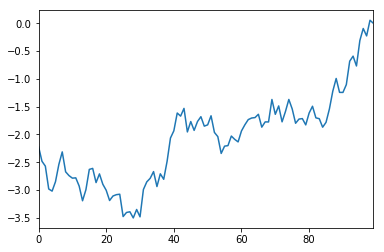

In [9]:
bm_sampler = brownian_sampler()
data_time = range(0,100)
target_time = range(0,100)
data, target = bm_sampler(1)
plt.plot(data_time, data.flatten())
plt.xlim(min(data_time),max(data_time))

In [10]:
network_parameters = {"number_features": 10,
                      "receptive_fields_size": 50,
                      "number_hidden_units": 100,
                      "number_target_time_points": 100}
kernels_parameters = {"number_output_kernels": 3,
                      "minimal_scale": 0.01,
                      "scale_step": 0.05}
center_points_parameters = {"initial_data_size": 100}
bm_forecaster = neural_ensemble_forecaster(network_parameters, 
                                           kernels_parameters, 
                                           center_points_parameters,
                                           bm_sampler)

Number of convolutional layers: 5
Number of linear layers: 1
Number of output links: 300
total number of links: 306


In [12]:
bm_forecaster.train_network(batch_size=500,n_epochs=10)

Training set loss: 251.68746875
Training set loss: 251.53684375
Training set loss: 251.561838281
Training set loss: 250.907630414
Training set loss: 250.815203917


[251.68746874999999,
 251.53684375,
 251.56183828125,
 250.90763041406251,
 250.81520391664066]

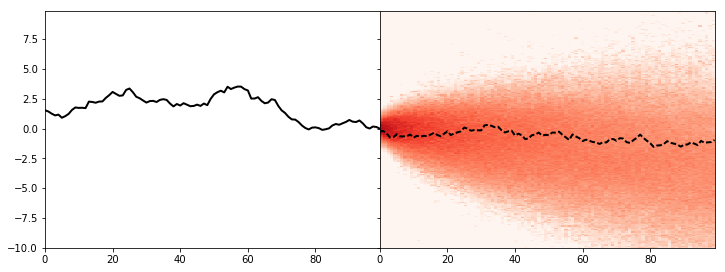

In [13]:
data, target = bm_sampler(1)
output_range = np.arange(-10,10,0.1)
bm_forecaster.visualize_forecast(data_time, data, target_time, output_range, target = target)

In [25]:
class lorentz_sampler(object):
    #
    def __init__(self, sigma = 10, beta =8./3., rho = 28., total_time = np.linspace(0, 4, 200)):
        self.sigma = sigma
        self.beta = beta
        self.rho = rho
        self.total_time = total_time
    #
    def __call__(self, batch_size):
        # dynamics
        def lorentz_deriv((x, y, z), t0, sigma=self.sigma, beta=self.beta, rho=self.rho):
            """Compute the time-derivative of a Lorenz system."""
            return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]
        # initial condition
        from scipy import integrate
        x0 = -15 + 30 * np.random.random((batch_size, 3))
        # Solve for the trajectories
        t = np.linspace(0, 4, 200)
        x_t = np.asarray([integrate.odeint(lorentz_deriv, x0i, t) 
                                                   for x0i in x0]).astype("float32")
        return [x_t[:,:100,0].astype("float32"), x_t[:,100:,0].astype("float32")]  

(0, 99)

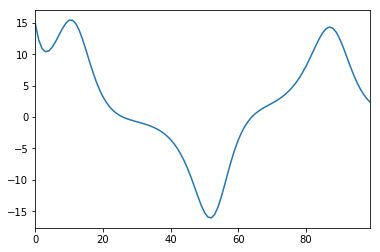

In [30]:
lor_sampler = lorentz_sampler()
data_time = range(0,100)
target_time = range(0,100)
data, target = lor_sampler(1)
plt.plot(data_time, data.flatten())
plt.xlim(min(data_time),max(data_time))

In [57]:
network_parameters = {"number_features": 30,
                      "receptive_fields_size": 50,
                      "number_hidden_units": 100,
                      "number_target_time_points": 100}
kernels_parameters = {"number_output_kernels": 3,
                      "minimal_scale": 0.01,
                      "scale_step": 0.05}
center_points_parameters = {"initial_data_size": 100}
lor_forecaster = neural_ensemble_forecaster(network_parameters, 
                                            kernels_parameters, 
                                            center_points_parameters,
                                            lor_sampler)

Number of convolutional layers: 5
Number of linear layers: 1
Number of output links: 300
total number of links: 306


In [59]:
lor_forecaster.train_network(batch_size=100,n_epochs=1000)

Training set loss: 329.677773437
Training set loss: 328.721532813
Training set loss: 327.438803297
Training set loss: 325.603332819
Training set loss: 322.041626536
Training set loss: 318.624416127
Training set loss: 317.318451673
Training set loss: 314.811012456
Training set loss: 311.666298605
Training set loss: 308.507293081
Training set loss: 304.570780247
Training set loss: 300.366167743
Training set loss: 297.192561496
Training set loss: 293.065926179
Training set loss: 290.020300205
Training set loss: 287.804859182
Training set loss: 284.260376562
Training set loss: 281.787330992
Training set loss: 279.466795135
Training set loss: 277.610777497
Training set loss: 274.104155358
Training set loss: 272.020192403
Training set loss: 270.045968932
Training set loss: 267.082247335
Training set loss: 266.009205888
Training set loss: 263.971521223
Training set loss: 261.099046448
Training set loss: 258.883675279
Training set loss: 257.070196703
Training set loss: 256.444955032
Training s

[329.67777343749998,
 328.72153281250002,
 327.43880329687499,
 325.60333281890627,
 322.04162653643914,
 318.62441612732823,
 317.31845167251089,
 314.81101245629634,
 311.66629860522505,
 308.50729308116979,
 304.5707802473101,
 300.36616774250876,
 297.19256149643206,
 293.06592617929749,
 290.02030020523097,
 287.80485918186213,
 284.26037656230835,
 281.78733099203231,
 279.46679513479614,
 277.61077749668488,
 274.10415535825229,
 272.02019240268436,
 270.0459689321118,
 267.08224733501055,
 266.00920588823351,
 263.97152122259416,
 261.09904644811382,
 258.88367527922219,
 257.07019670273246,
 256.44495503233833,
 254.21050634963154,
 253.37941014320157,
 252.71497104411827,
 251.19649392854831,
 250.95510930087411,
 251.37753404152056,
 250.46570257363169,
 248.97257728776668,
 248.29886318902854,
 245.82301765967563,
 244.43488453871225,
 242.93435491385694,
 241.68132943334913,
 241.09520398945031,
 240.46059706739229,
 238.87610940583778,
 237.00174275935359,
 234.7958444475

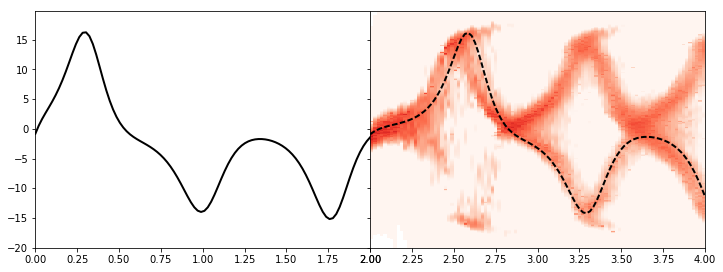

In [67]:
data, target = lor_sampler(1)
data_time = np.linspace(0,2,100)
target_time = np.linspace(2,4,100) 
output_range = np.arange(-20,20,0.1)
lor_forecaster.visualize_forecast(data_time, data, target_time, output_range, target = target)